# Credit Card Default Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.options.display.max_columns=None

In [3]:
data = pd.read_csv('Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
data.rename({'default.payment.next.month':'default'}, axis=1, inplace=True)

In [5]:
data.drop('ID', axis=1, inplace=True)

In [6]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


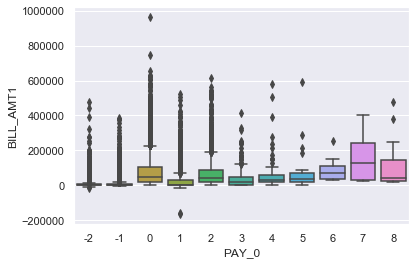

In [7]:
sns.boxplot(data.PAY_0,data.BILL_AMT1);

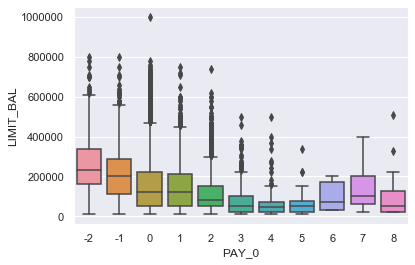

In [8]:
sns.boxplot(data.PAY_0,data.LIMIT_BAL);

We can see that clients with higher limit tend to pay duly. 

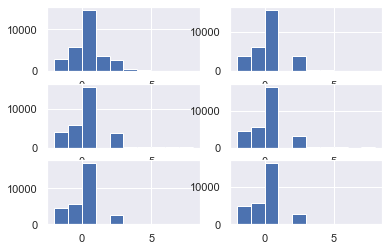

In [9]:
f, ax = plt.subplots(3,2)
ax[0,0].hist(data.PAY_0)
ax[0,1].hist(data.PAY_2)
ax[1,0].hist(data.PAY_3)
ax[1,1].hist(data.PAY_4)
ax[2,0].hist(data.PAY_5)
ax[2,1].hist(data.PAY_6)
plt.show()

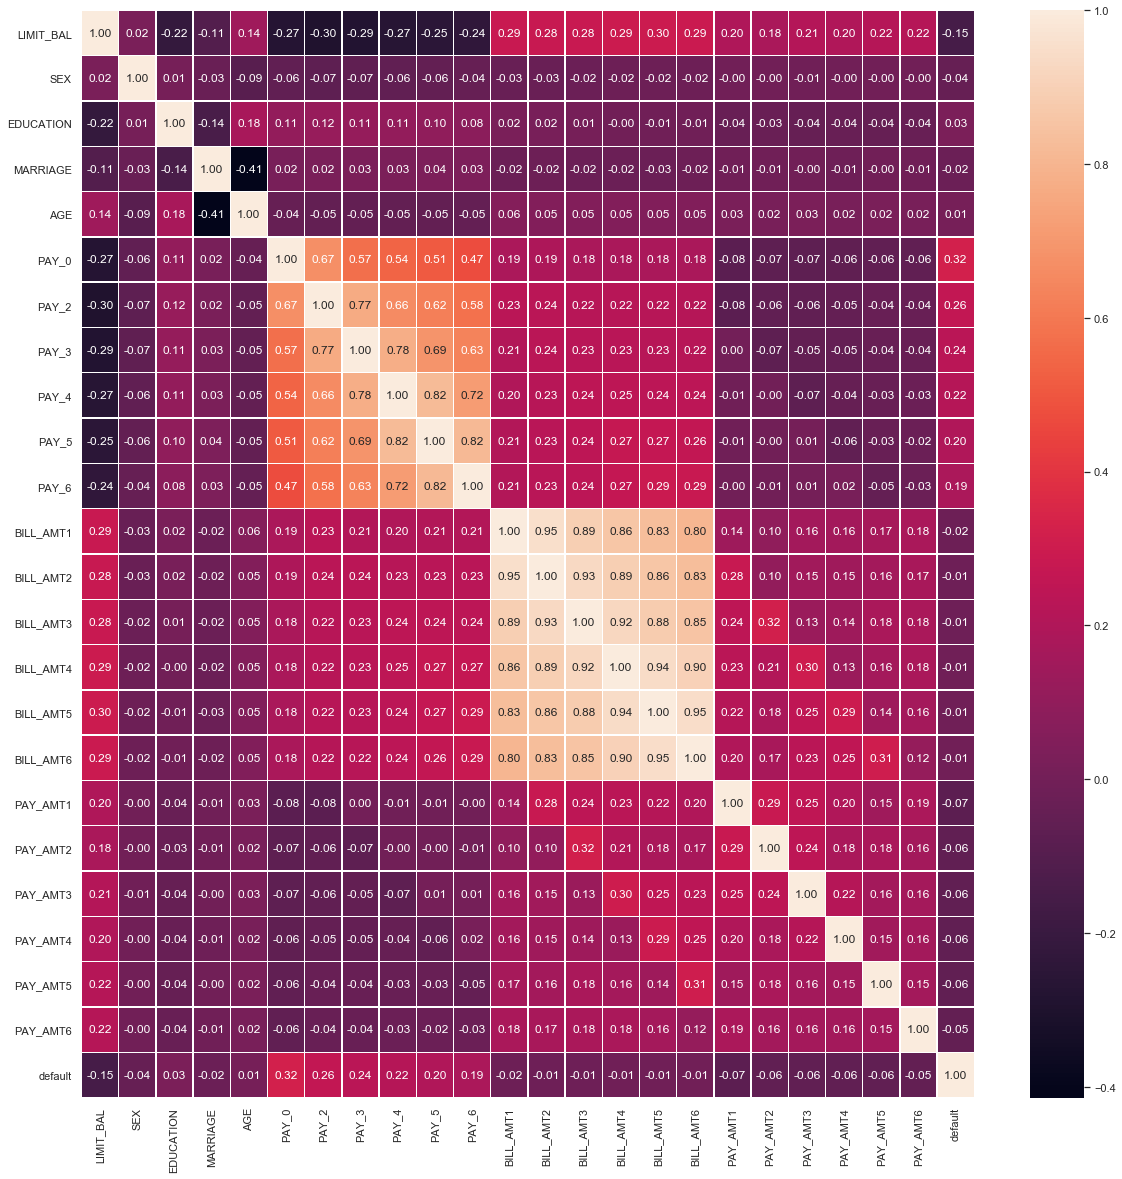

In [10]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=.5, ax=ax);

In [11]:
new_data = data.drop(['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                      'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)
new_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [12]:
new_data = new_data.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],
                         axis=1)
new_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,default
0,20000.0,2,2,1,24,2,3913.0,1
1,120000.0,2,2,2,26,-1,2682.0,1
2,90000.0,2,2,2,34,0,29239.0,0
3,50000.0,2,2,1,37,0,46990.0,0
4,50000.0,1,2,1,57,-1,8617.0,0


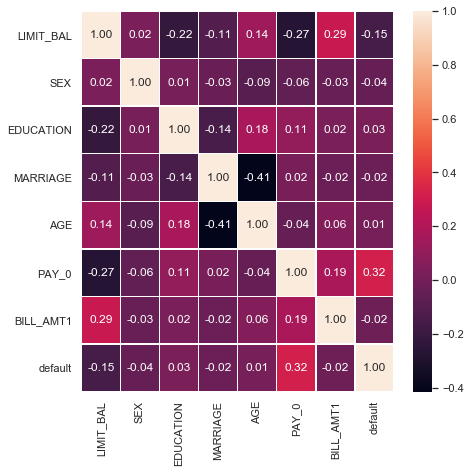

In [13]:
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(new_data.corr(), annot=True, fmt='.2f', linewidths=.5, ax=ax);

### Best Features

In [14]:
X = data.drop('default', axis=1)
y = data.default

In [15]:
from sklearn.feature_selection import f_classif

score,p_val = f_classif(X,y)

table = pd.DataFrame()
table['Features'] = X.columns.values
table['Score'] = score
table['P Value'] = p_val
table.head()

,Features,Score,P Value
0,LIMIT_BAL,724.068539,1.302244e-157
1,SEX,47.978854,4.395249e-12
2,EDUCATION,23.547112,1.225038e-06
3,MARRIAGE,17.781271,2.485364e-05
4,AGE,5.788556,1.613685e-02


In [16]:
table.nlargest(23,'Score')

,Features,Score,P Value
5,PAY_0,3537.714970,0.000000e+00
6,PAY_2,2239.169136,0.000000e+00
7,PAY_3,1757.466444,0.000000e+00
8,PAY_4,1476.845967,1.899297e-315
9,PAY_5,1304.591176,1.126608e-279
10,PAY_6,1085.402485,7.296740e-234
0,LIMIT_BAL,724.068539,1.302244e-157
17,PAY_AMT1,160.403810,1.146488e-36
18,PAY_AMT2,103.291524,3.166657e-24
20,PAY_AMT4,97.188000,6.830942e-23


## Model using old data

In [17]:
#Splitting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
#Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

reg = LogisticRegression()
reg.fit(X_train_scaled, y_train)
y_pred_train = reg.predict(X_train_scaled)
y_pred_test = reg.predict(X_test_scaled)
print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))
print('Testing Accuracy: ', accuracy_score(y_test,y_pred_test))

Training Accuracy:  0.808
Testing Accuracy:  0.8193333333333334


## Model using new data

In [20]:
X1 = new_data.drop('default', axis=1)

In [21]:
#Splitting the data
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y,test_size=0.2,random_state=5)

#Scaling data
scaler1 = StandardScaler().fit(X_train1)
X_train_scaled1 = scaler1.transform(X_train1)
X_test_scaled1 = scaler1.transform(X_test1)

reg1 = LogisticRegression()
reg1.fit(X_train_scaled1, y_train1)
y_pred_train1 = reg1.predict(X_train_scaled1)
y_pred_test1 = reg1.predict(X_test_scaled1)
print('Training Accuracy: ',accuracy_score(y_train1,y_pred_train1))
print('Testing Accuracy: ', accuracy_score(y_test1,y_pred_test1))

Training Accuracy:  0.8099166666666666
Testing Accuracy:  0.811


### SVM

In [22]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train_scaled,y_train)
y_pred_svm_train = model.predict(X_train_scaled)
y_pred_svm_test = model.predict(X_test_scaled)
print('Training Accuracy: ',accuracy_score(y_train,y_pred_svm_train))
print('Testing Accuracy: ', accuracy_score(y_test,y_pred_svm_test))

Training Accuracy:  0.8236666666666667
Testing Accuracy:  0.826


### KNN

Training Accuracy for k= 1 is  0.9995833333333334
Training Accuracy for k= 2 is  0.8644583333333333
Training Accuracy for k= 3 is  0.86675
Training Accuracy for k= 4 is  0.8435
Training Accuracy for k= 5 is  0.8430416666666667
Training Accuracy for k= 6 is  0.8327916666666667
Training Accuracy for k= 7 is  0.8348333333333333
Training Accuracy for k= 8 is  0.827625
Training Accuracy for k= 9 is  0.8289583333333334


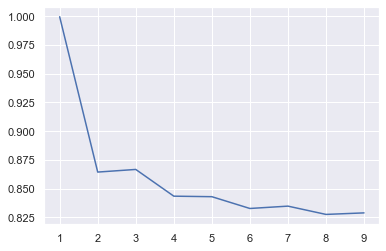

In [23]:
from sklearn.neighbors import KNeighborsClassifier

k=10
acc=[]
for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred = knn.predict(X_train_scaled)
    print('Training Accuracy for k=',i,'is ',accuracy_score(y_train,pred))
    acc.append(accuracy_score(y_train,pred))
    
num = range(1,k)

plt.plot(num,acc)
plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
print('Testing Accuracy is ',accuracy_score(y_test,pred))

Testing Accuracy is  0.7993333333333333


### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000,min_samples_leaf=3)
rfc.fit(X_train_scaled,y_train)
y_pred_rfc_train = rfc.predict(X_train_scaled)
y_pred_rfc_test = rfc.predict(X_test_scaled)
print('Training Accuracy: ',accuracy_score(y_train,y_pred_rfc_train))
print('Testing Accuracy: ', accuracy_score(y_test,y_pred_rfc_test))

Training Accuracy:  0.914375
Testing Accuracy:  0.826
